In [2]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.0


In [3]:
file = "/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intermediates/FN27_de_novo.vcf"

In [4]:
chrom = 'Chr09'

In [5]:
allel.vcf_to_hdf5(file,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intermediates/FN27_de_novo.h5',
                  fields='*',
                  region=chrom,
                  overwrite=True)

In [6]:
callset = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/intermediates/FN27_de_novo.h5', mode='r')

In [7]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [8]:
def plot_windowed_variant_density(pos, window_size, title=None):
    
    # setup windows 
    bins = np.arange(0, pos.max(), window_size)
    
    # use window midpoints as x coordinate
    x = (bins[1:] + bins[:-1])/2
    
    # compute variant density in each window
    h, _ = np.histogram(pos, bins=bins)
    y = h / window_size
    
    # plot
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.despine(ax=ax, offset=10)
    ax.plot(x, y)
    ax.set_xlabel('Chromosome position (bp)')
    ax.set_ylabel('Variant density (bp$^{-1}$)')
    if title:
        ax.set_title(title)

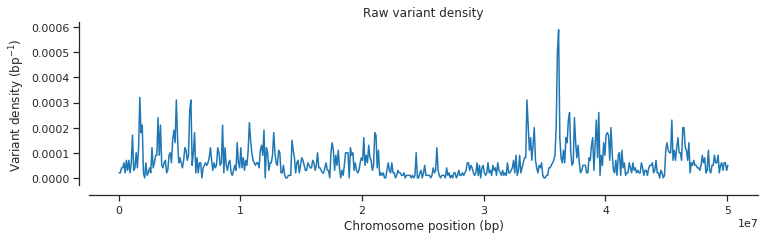

In [9]:
title = 'Raw variant density'
pos = variants['POS'][:]
plot_windowed_variant_density(pos, window_size=100000, title=title)

In [10]:
calldata = callset['calldata/GT']
gt = allel.GenotypeChunkedArray(calldata)

In [11]:
gn = gt.to_n_alt(fill=-1)

In [12]:
r = allel.rogers_huff_r(gn)

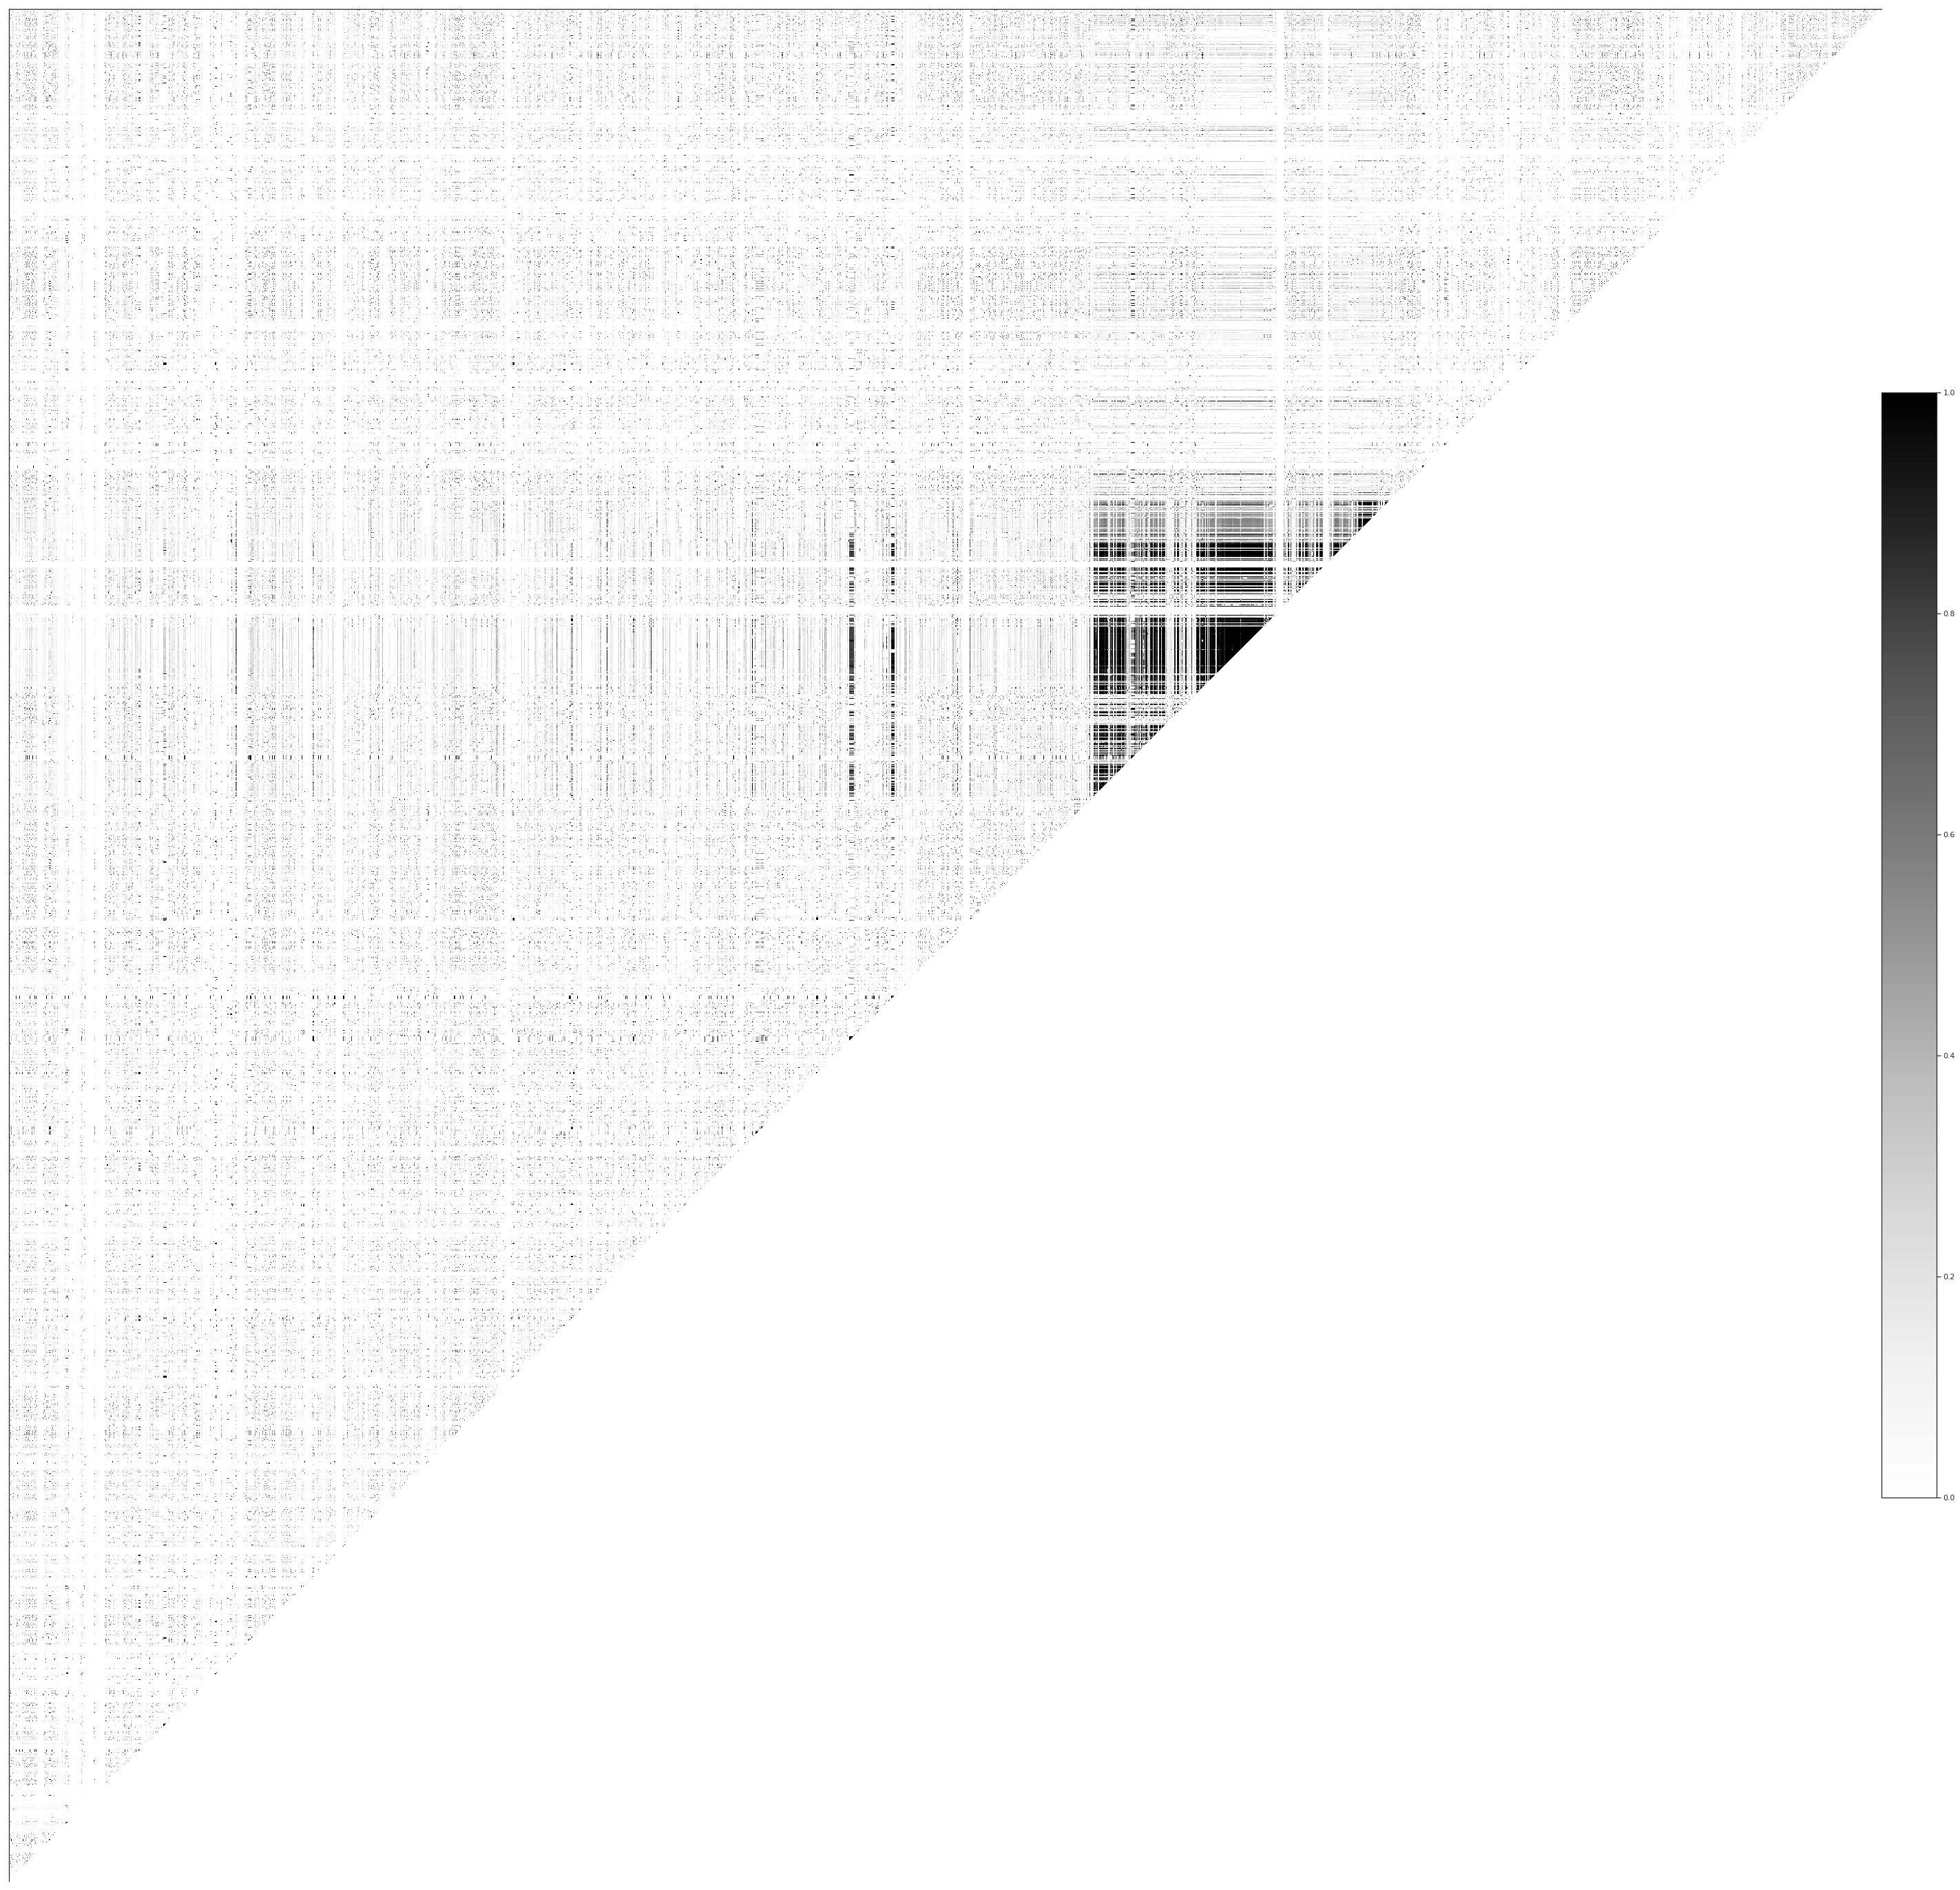

In [13]:
allel.plot_pairwise_ld(r, colorbar=True)

In [43]:
wsize = 100000
vcf_file = file
out_name = "outname"

In [44]:
# Initialize variables
wg_pi = []
wg_pos = []
offset = 0

In [45]:
# Define the function for plotting
def plot_pi(window_pos, pi, chrom):
    fig = plt.figure(figsize=(9, 3))
    plt.plot(window_pos, pi)
    if chrom == "genomic":
        chrom_breaks = [56831624, 105409129, 151188910, 203578056, 245812554, 297229040, 341859686, 389697626, 439887390, 491454288, 526221155, 566312469, 612186631, 661228823, 712985166, 750872180, 792513546, 850532288, 901279204, 949183385]
        for xc in chrom_breaks:
            plt.axvline(x=xc, color='0.50', linewidth=0.25)
        plt.xlabel('Cumulative Genomic Position')
    else:
        plt.xlabel(key + ' Position')
    plt.title(out_name + "_" + chrom)
    plt.ylabel('Pi')
    plt.ylim(bottom=0)
    #plt.ylim(top=0.0001)
    plt.xlim(left=0)
    plt.tight_layout()
    #plt.savefig(out_name + "_" + chrom + ".pdf")
    #plt.close(fig)

In [46]:
exec(open("/panfs/roc/groups/9/morrellp/shared/References/Reference_Sequences/Soybean/PhytozomeV11/Gmax/assembly/soybean_contigs_dict.py").read())

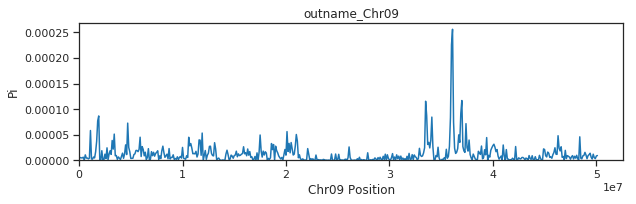

In [47]:
key = chrom
# Import and process the vcf file
#print("Processing " + key)
callset = allel.read_vcf(vcf_file, region=key)
try:
    g = allel.GenotypeArray(callset['calldata/GT'])
except TypeError:
    pass
ac = g.count_alleles()
pos = callset['variants/POS']
# Calculate pi
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac, size=int(wsize), start=1, stop=int(chrom_lengths[key]))
window_pos = windows[:,0]
# Plot pi for this chromosome
plot_pi(window_pos, pi, key)
# Add this chromosome's data to the whole genome set
wg_pi.extend(pi)
offset_pos = [x+offset for x in window_pos]
wg_pos.extend(offset_pos)
offset += int(chrom_lengths[key])

In [1]:
%%bash
jupyter nbconvert  --to=html 'LD_3.6.ipynb'

[NbConvertApp] Converting notebook LD_3.6.ipynb to html
[NbConvertApp] Writing 2846967 bytes to LD_3.6.html
